<a href="https://colab.research.google.com/github/Pavithra777/EVA-8-Phase-1/blob/main/Assignment%208/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/utils.py
!pip install torch_lr_finder
import utils

--2023-02-17 20:09:36--  https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7522 (7.3K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]   7.35K  --.-KB/s    in 0s      

2023-02-17 20:09:36 (88.8 MB/s) - ‘utils.py.1’ saved [7522/7522]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/model.py
!pip install torch_lr_finder
import model

--2023-02-17 20:09:42--  https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5314 (5.2K) [text/plain]
Saving to: ‘model.py.1’

model.py.1          100%[===================>]   5.19K  --.-KB/s    in 0s      

2023-02-17 20:09:42 (76.1 MB/s) - ‘model.py.1’ saved [5314/5314]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import albumentations as A
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
train_dataset_dict = utils.get_metadata_of_CIFAR10_train_dataset()

Files already downloaded and verified
[Train]
-Numpy Shape : (50000, 32, 32, 3)
-min: [0. 0. 0.]
-max: [1. 1. 1.]
-mean: [0.49139968 0.48215841 0.44653091]
-std: [0.24703223 0.24348513 0.26158784]
-var: [15.56135559 15.11767693 17.44919073]
-classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
train_dataset = train_dataset_dict['dataset'] 

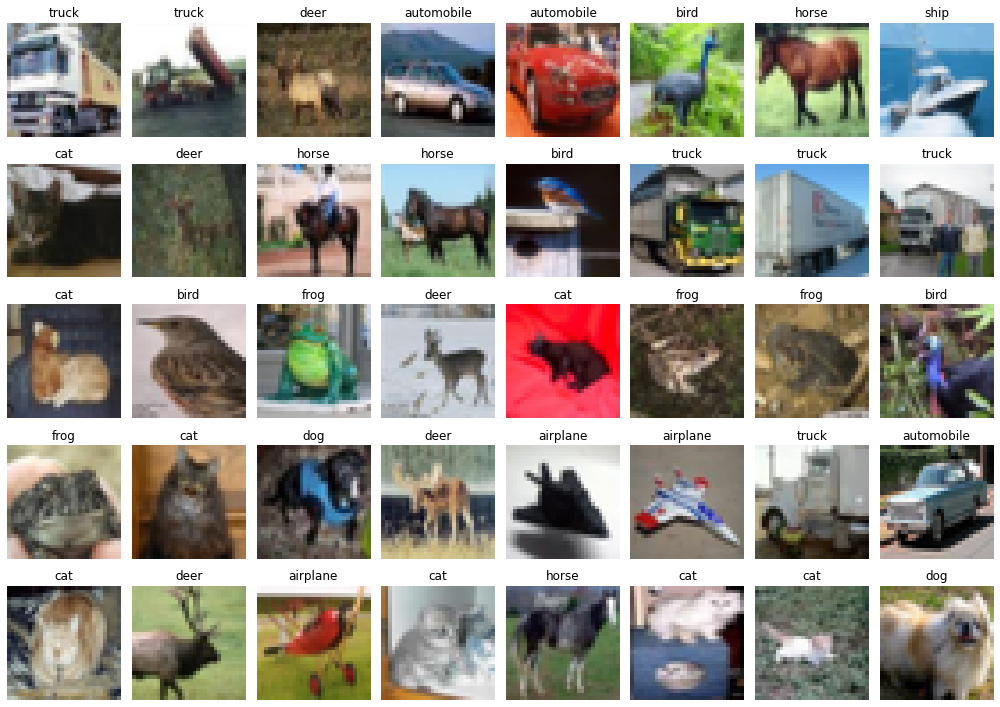

In [6]:
utils.visualize_data(train_dataset)

In [7]:
train_agumentation = {A.Normalize((0.49139968, 0.48215841, 0.44653091),(0.24703223 ,0.24348513, 0.26158784)),
                A.HorizontalFlip(),
                A.CoarseDropout(max_holes=1,max_height=8,max_width=8,
                              min_height=8,min_width=8,
                              fill_value= 0.473363,mask_fill_value=None,always_apply=True),
                A.PadIfNeeded(min_height=36, min_width=36, p=0.2,always_apply=True),
                A.RandomCrop(32, 32, always_apply=True, p=0.2)
                }

In [8]:
test_agumentation = {A.Normalize((0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784))
                }

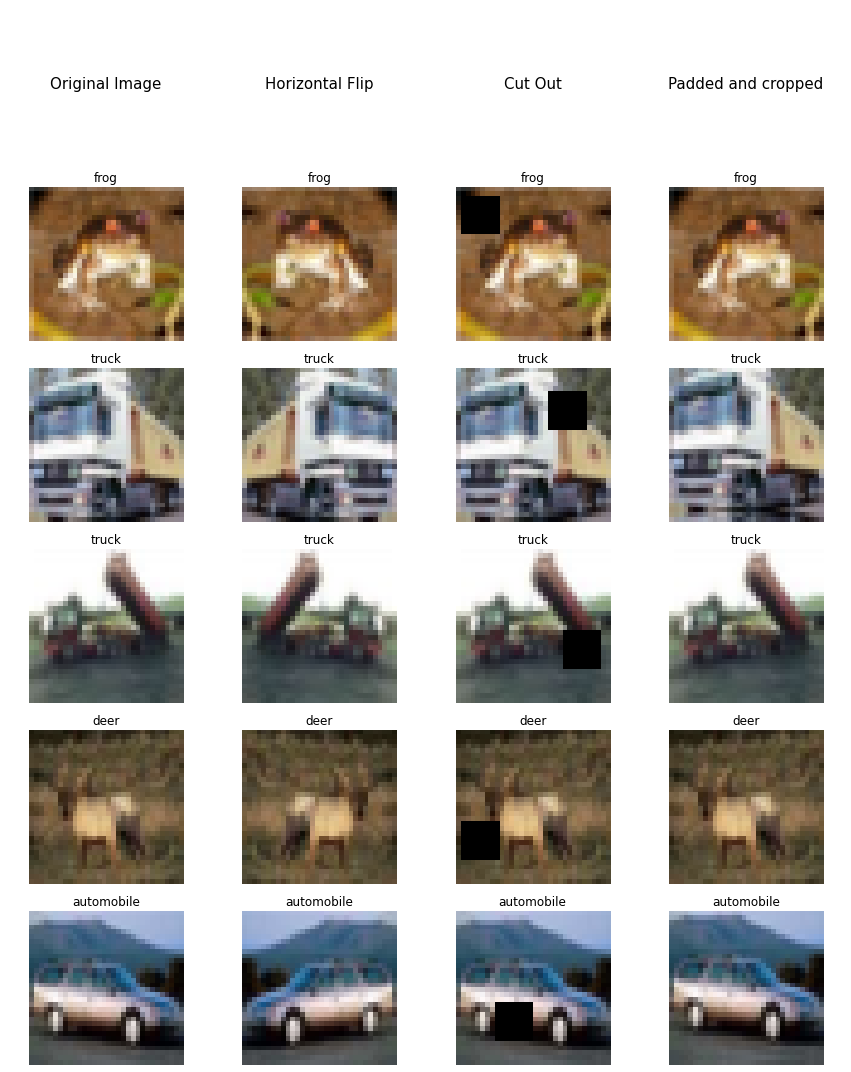

In [9]:
utils.show_images(train_dataset,{
    'Original Image':None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Cut Out':A.CoarseDropout(max_holes=1,max_height=8,max_width=8,
                              min_height=8,min_width=8,
                              fill_value= 0.473363,mask_fill_value=None,always_apply=True)
    ,'Padded and cropped': A.Compose([A.PadIfNeeded(min_height=36, min_width=36, p=0.2),
                        A.RandomCrop(32, 32, always_apply=True, p=0.2)] ) 
    
})

In [10]:
SEED=1
#CUDA?
cuda=torch.cuda.is_available()
print("CUDA Available:",cuda)

#For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)
  BATCH_SIZE=512
else:
  BATCH_SIZE=512

CUDA Available: True


In [11]:
train_loader,test_loader=utils.get_CIFAR10_dataset(train_agumentation,test_agumentation,BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
device= utils.get_device()

device :  cuda


In [13]:
net=model.CustomResNet().to(device)

In [14]:
utils.get_summary(device,net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1, 128,

In [15]:
net1=model.CustomResNet().to(device)

  0%|          | 0/118 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.24E+00


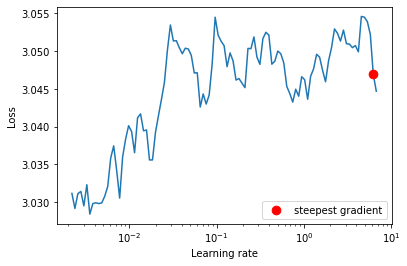

Max LR is 0.0035237780584504125


In [ ]:
optimizer= utils.get_optimizer(net1,lr=0.001,momentum=0.9,l2=True)
criterion = nn.CrossEntropyLoss()
endlr=10
ler_rate = utils.find_lr(net1,optimizer,criterion,endlr,train_loader)


In [18]:
optimizer= utils.get_optimizer(net1,lr=0.001,momentum=0.9,l2=True)

In [19]:
scheduler =utils.get_scheduler(optimizer,len(train_loader),ler_rate)

In [20]:
net2=model.CustomResNet().to(device)


In [ ]:

utils.fit_model(net2,device,train_loader,test_loader,scheduler,optimizer,NUM_EPOCHS=24)


EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
Batch_id=97 Loss=1.67342 Accuracy=40.02: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



 Test set : Average loss: 1.4176, Accuracy: 4862/10000 (48.62%)

EPOCH: 2


Batch_id=97 Loss=1.21748 Accuracy=56.72: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 1.1977, Accuracy: 5620/10000 (56.20%)

EPOCH: 3


Batch_id=97 Loss=1.05036 Accuracy=63.07: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



 Test set : Average loss: 1.0769, Accuracy: 6126/10000 (61.26%)

EPOCH: 4


Batch_id=97 Loss=0.93525 Accuracy=67.22: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



 Test set : Average loss: 1.0340, Accuracy: 6261/10000 (62.61%)

EPOCH: 5


Batch_id=97 Loss=0.84338 Accuracy=70.46: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 1.0018, Accuracy: 6437/10000 (64.37%)

EPOCH: 6


Batch_id=97 Loss=0.77362 Accuracy=72.90: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]



 Test set : Average loss: 0.9518, Accuracy: 6630/10000 (66.30%)

EPOCH: 7


Batch_id=97 Loss=0.71100 Accuracy=75.46: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]



 Test set : Average loss: 0.8665, Accuracy: 6948/10000 (69.48%)

EPOCH: 8


Batch_id=97 Loss=0.65420 Accuracy=77.56: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]



 Test set : Average loss: 0.8482, Accuracy: 7047/10000 (70.47%)

EPOCH: 9


Batch_id=97 Loss=0.60746 Accuracy=79.18: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]



 Test set : Average loss: 0.8155, Accuracy: 7096/10000 (70.96%)

EPOCH: 10


Batch_id=97 Loss=0.56478 Accuracy=80.81: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



 Test set : Average loss: 0.7857, Accuracy: 7230/10000 (72.30%)

EPOCH: 11


Batch_id=97 Loss=0.52819 Accuracy=82.08: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



 Test set : Average loss: 0.8333, Accuracy: 7130/10000 (71.30%)

EPOCH: 12


Batch_id=97 Loss=0.49312 Accuracy=83.32: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 0.8348, Accuracy: 7163/10000 (71.63%)

EPOCH: 13


Batch_id=97 Loss=0.45732 Accuracy=84.47: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]



 Test set : Average loss: 0.7411, Accuracy: 7414/10000 (74.14%)

EPOCH: 14


Batch_id=97 Loss=0.42874 Accuracy=85.73: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



 Test set : Average loss: 0.7745, Accuracy: 7327/10000 (73.27%)

EPOCH: 15


Batch_id=97 Loss=0.39786 Accuracy=86.82: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



 Test set : Average loss: 0.7789, Accuracy: 7335/10000 (73.35%)

EPOCH: 16


Batch_id=97 Loss=0.37211 Accuracy=87.61: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 0.7662, Accuracy: 7391/10000 (73.91%)

EPOCH: 17


Batch_id=97 Loss=0.34504 Accuracy=88.73: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 0.7512, Accuracy: 7432/10000 (74.32%)

EPOCH: 18


Batch_id=97 Loss=0.32626 Accuracy=89.27: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]



 Test set : Average loss: 0.7624, Accuracy: 7462/10000 (74.62%)

EPOCH: 19


Batch_id=97 Loss=0.30056 Accuracy=90.49: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



 Test set : Average loss: 0.7737, Accuracy: 7412/10000 (74.12%)

EPOCH: 20


Batch_id=97 Loss=0.28011 Accuracy=91.20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]



 Test set : Average loss: 0.7445, Accuracy: 7526/10000 (75.26%)

EPOCH: 21


Batch_id=97 Loss=0.26299 Accuracy=91.75: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 0.7706, Accuracy: 7443/10000 (74.43%)

EPOCH: 22


Batch_id=97 Loss=0.23890 Accuracy=92.56: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



 Test set : Average loss: 0.7132, Accuracy: 7652/10000 (76.52%)

EPOCH: 23


Batch_id=97 Loss=0.22434 Accuracy=93.26: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]



 Test set : Average loss: 0.6787, Accuracy: 7757/10000 (77.57%)

EPOCH: 24


Batch_id=97 Loss=0.20742 Accuracy=93.81: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]



 Test set : Average loss: 0.7089, Accuracy: 7732/10000 (77.32%)



(CustomResNet(
   (prep_layer): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
   )
   (layer1Conv): Sequential(
     (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (3): ReLU()
   )
   (layer1Res): Sequential(
     (0): ResBlock(
       (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (relu1): ReLU(inplace=True)
       (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, tr